# An Analysis of Taiwan-China Relationships through Key Economic Indicators

## Summer 2024 Data Science Project

Tutorial by Kiara Eunice Abamonga, Jessica Nguyen, and Eric Bennett



## Table of Contents

*   [Introduction](#introduction)
*   [Data Curation](#data-curation)
  *   [Data Collection](#data-collection)
  *   [Data Cleaning](#data-cleaning)
*   [Exploratory Data Analysis](#exploratory-data-analysis)
  *   [Taiwan GDP Analysis](#taiwan-gdp-analysis)
  *   [Taiwan Imports Analysis](#taiwan-imports-analysis)
  *   [Impact of Mainland Chinese Investment on Taiwanese GDP](#impact-of-mainland-gdp)
*   [Primary Analysis](#primary-analysis)
*   [Visualization](#visualization)
*   [Insights and Conclusions](#insights-and-conclusions)
*   [Related Links](#related-links)


<a name="introduction"></a>
## Introduction

Since 1949, Taiwan-China geopolitical tensions have been a major issue in East Asia. The [Center for Preventative Action](hhttps://www.cfr.org/global-conflict-tracker/conflict/confrontation-over-taiwan) states: “Taiwan’s disputed status is a direct result of the Chinese Civil War, in which the defeated Nationalist (Kuomintang) government fled the mainland and moved its government to the island in 1949.” Since then, the People’s Republic of China (PRC) has claimed that the island must be “reunified” with the mainland, whereas Taiwan considers itself a sovereign state. Politically, the two are very different, with China having a Communist Party regime and Taiwan having its own democratically elected government. The ongoing conflict has resulted in increased military and political tensions, with conflict escalating in recent years.

Currently, Taiwan and China relations have been very tense. [China has increased its military presence around Taiwan](https://www.cfr.org/backgrounder/china-taiwan-relations-tension-us-policy-biden) by “employing a variety of coercive tactics short or armed conflict, increasing the frequency and scale of patrols by PLA bombers, fighter jets, and surveillance aircraft, and conducting numerous cyberattacks” as an attempt to intimidate Taiwan. In response, Taiwan has improved its defense capabilities and is attempting to establish better diplomatic ties, particularly with the United States.

Our project seeks to quantify the disruptions caused by geopolitical tensions between Taiwan and China, with a particular emphasis on both sides’ economic impact. We will examine key economic indicators such as imports, exports, and GDP to determine the severity of the situation. We hope that our analysis will shed light on the conflict’s broader implications as well as inform others about the economic stakes.

> Specifically, we want to answer the following question: What is the impact of geopolitical tensions between Taiwan and China on both countries’ economic relationship?

### Why is This Important?

The economic consequences of these tensions are significant around the world. [Taiwan is an important player in the global semiconductor industry](https://www.cnbc.com/2024/01/12/taiwans-strength-in-semiconductors-could-be-its-achilles-heel-economist-says.html), and any disruption in its economy can have a significant impact on global technology supply chains. With its [massive economy and vital role in global](https://www.usbank.com/investing/financial-perspectives/market-news/chinas-economic-influence.html) trade, China, can exert influence over global markets through its economic policies and practices. The current geopolitical climate has created uncertainty in Taiwan and China’s trade, investment, and labor markets.


<a name="data-curation"></a>
## Data Curation

Here, we will start to collect all of our data needed for our analysis. First, we must import the relevant Python libraries for our project.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np


from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

<a name="data-collection"></a>
### Data Collection

In this project, we will mainly focus on Taiwan and China, but we may include other nations to provide a more in-depth comparison. We have found much information from the Statistical Yearbook released by Taiwan over the last handful of years regarding changes in socioeconomic statues that includes .csv files of the following topics:


In [ ]:
# Extracting the names of each table to identify where to look for
# data which could provide insight into Taiwan-China relationships
for i in range(1, 95):
    df = pd.read_csv(f"y{i:03}.csv")
    print(df.iloc[3][0])

Table 1. Land, agricultural land and forest land areas
Table 2. The mean temperature
Table 3. General situation of population
Table 4. Number and rates of births, deaths, immigrants and emigrants, marriages and divorces
Table 5. Fertility rates of childbearing age women
Table 6. Life expectancy and death rates by 5-year age group
Table 7. Indicators of labor force status
Table 8. Employed persons by industry
Table 9. Unemployment rates by educational attainment and age
Table 10. Average monthly total earnings per employee on payrolls of establishments by industry
Table 11. Educational situation
Table 12. Expenditure situation on education
Table 13. Primary and junior high school
Table 14. Senior secondary schools
Table 15. Higher Education
Table 16. Number of overseas compatriot Chinese students in all levels of schools 
Table 17. Summary of R&D personnel
Table 18. Summary of R&D expenditure
Table 19. Number of patent applications and grant
Table 20. General conditions of culture and m

Throughout this project, we used Table 55: Composition of exports and imports and Table 48: Approved Mainland China investment.

On top of this data we used [IMF's GDP Data 📈: 1980-2028 Global Trends](https://www.kaggle.com/datasets/kanchana1990/imfs-gdp-data-1980-2028-global-trends/data) from Kaggle. This helped provide information about the GDP from several countries across the world. Below we show the first ten countries of the dataset, but we clean the set in the section.

In [ ]:
gdp_df = pd.read_csv("gdp.csv")
gdp_df.head(10)

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,586.204,611.268,443.385,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,...,5345.058,5278.986,6259.762,6657.637,8057.490,8877.337,9280.572,9818.569,10470.180,11187.728
2,Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,...,3953.402,3321.601,3659.709,4306.820,4874.706,5130.360,5243.056,5335.671,5355.284,5365.190
3,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,40688.491,36973.845,41806.876,41084.874,44107.317,45642.103,46215.307,46546.578,46713.341,46920.949
4,Angola,802.627,731.427,712.576,723.654,747.325,817.068,743.735,828.958,875.526,...,2612.246,1709.283,2169.648,3438.147,2550.001,2452.737,2483.027,2507.490,2570.826,2622.394
5,Antigua and Barbuda,1920.249,2177.087,2448.585,2752.968,3200.985,3763.974,4617.610,5455.264,6547.259,...,17370.041,14468.071,15709.338,17441.463,19068.279,20405.877,21485.826,22250.670,23041.478,23862.682
6,Argentina,8361.209,6671.428,3257.853,3962.735,4374.783,3248.745,3857.027,3909.984,4524.498,...,10054.023,8571.937,10631.665,13619.875,13297.425,13394.339,13330.463,13704.371,14288.019,14813.269
7,Armenia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4596.861,4268.550,4679.460,6587.219,8283.119,9090.707,9785.538,10488.266,11248.191,12062.817
8,Aruba,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,31096.315,23565.550,28813.136,33032.454,35717.948,36958.639,38197.670,39449.907,40754.664,42117.086
9,Australia,11009.179,12530.324,12236.639,11593.755,12576.995,10969.258,11246.926,13000.587,16248.459,...,54289.066,53094.491,63841.724,64813.854,63487.049,62596.271,65317.386,67798.390,70227.696,72668.724


<a name="data-cleaning"></a>
### Data Cleaning

We clean the AnnualTotalImports.csv, AnnualExports.csv, and ChinaExports.csv datasets to prepare them for the machine learning phase of our lifecycle. In the majority of the process, we disregard other countries to focus on the data related to China and Taiwan.

In [ ]:
#GDP selection dataset for exploratory data analysis
selected_countries = ["Taiwan Province of China", "China, People's Republic of", "United States", "Japan", "Germany", "India"]
gdp_selected = gdp_df[gdp_df['Country'].isin(selected_countries)]

#imports data for exploratory data analysis
import_df = pd.read_csv("y055.csv")
import_df = import_df.drop(import_df.index[:8]).reset_index(drop=True) # get rid of unnecessary rows
import_df = import_df.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1) # drop these row which are actually a blank column or duplicate
import_df = import_df.drop(import_df.index[0:2]).reset_index(drop=True) # dropping NAs which are actual blank spaces
import_df = import_df.drop(import_df.index[5]).reset_index(drop=True) # dropping NAs which are actual blank spaces
import_df_pt2 = import_df.iloc[20:36].reset_index(drop=True) # filter out bottom part of df55, since these are supposed to be in separate cols and not rows
import_df_pt2 = import_df_pt2.drop(import_df_pt2.index[5]).drop(["EXTERNAL TRADE     "],axis=1).reset_index(drop=True) # drop blank row separating 2011 and 2012
import_df_pt2.insert(loc=1, column="Mid Capital Intension", value=[50.08,47.12,50.61,51.11,49.91,51.6,50.54,50.28,49.23,48.69,48,47.94,50.1,47.83,48.74]) # somehow the reading missed a column
import_df = import_df.drop(import_df.index[15:,]).reset_index(drop=True) # df55 should reflect the separation
import_df = pd.concat([import_df, import_df_pt2], axis=1) # merge the two dataframes
new_import_df_col_names = [
    "Year",
    "Total",
    "Capital Goods",
    "Raw Materials",
    "Consumer Goods",
    "Others",
    "High Labor Intension",
    "Mid Labor Intension",
    "Low Labor Intension",
    "High Capital Intension",
    "Mid Capital Intension",
    "Low Capital Intension",
    "High Technique Intension",
    "Mid Technique Intension",
    "Low Technique Intension",
    "High Energy Intension",
    "Mid Energy Intension",
    "Low Energy Intension"
  ]
import_df.columns = new_import_df_col_names

#Mainland China investment data for exploratory data analysis
df48 = pd.read_csv("y048.csv")
df48.rename(columns={df48.columns[0]: 'Year', df48.columns[2]: 'Mainland China Investment'}, inplace=True)

investment_df = df48[['Year', 'Mainland China Investment']]

# dataset to be used for machine learning phase
taiwan_china_trade = pd.read_csv("TotalImportsExportsFromToChina.csv")
imports_from_china = taiwan_china_trade[taiwan_china_trade["Imports/Exports"] == "Imports"]
exports_from_china = taiwan_china_trade[taiwan_china_trade["Imports/Exports"] == "Exports"].reset_index(drop=True)

# rename last time value to proper year format
imports_from_china.loc[imports_from_china["Time"] == "2024/1~2024/5(preliminary)", "Time"] = "2024"
exports_from_china.loc[exports_from_china["Time"] == "2024/1~2024/5(preliminary)", "Time"] = "2024"

<a name="exploratory-data-analysis"></a>

## Exploratory Data Analysis

<a name="taiwan-gdp-analysis"></a>

### Taiwan GDP Analysis

For this section we will be making a basic visualization of Taiwan's GDP in the context of other similar countries to get an idea of Taiwan's economic status on the world stage.

This data is pulled from the "IMF's GDP Data: 1980-2028 Global Trends" dataset. The actual data spans from 1980 to 2023 but from 2024 to 2028 are predictions and expected trends. We have chosen other countries to compare against Taiwan's GDP which is seen in Purple.

<Figure size 1800x1000 with 0 Axes>

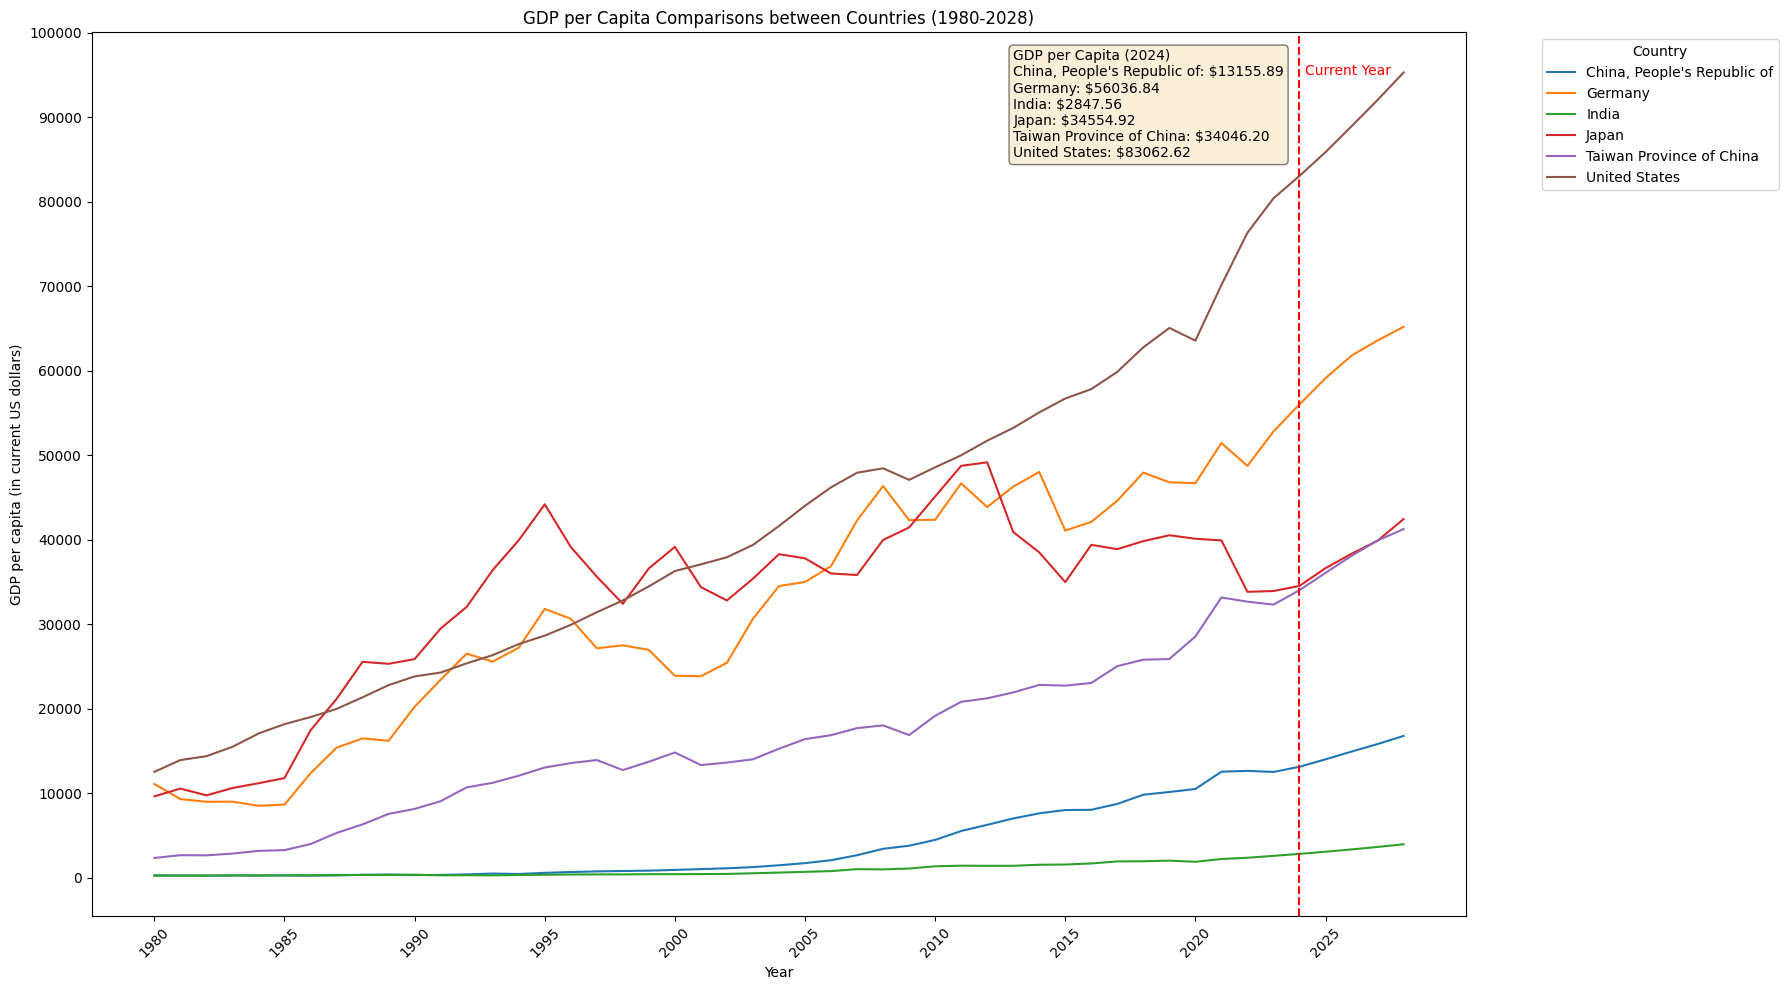

In [ ]:
gdp_selected

# Have years as rows and countries as columns, convert index to integer
transposed = gdp_selected.set_index('Country').transpose()
transposed.index = transposed.index.astype(int)

current_year = datetime.datetime.now().year

# Plot
plt.figure(figsize=(18, 10))
transposed.plot(kind='line', figsize=(18, 10))

# Line and Label for Current year
plt.axvline(x=current_year, color='red', linestyle='--')
plt.text(current_year + 0.2, plt.ylim()[1] * 0.95, 'Current Year', color='red')

plt.xlabel('Year')
plt.ylabel('GDP per capita (in current US dollars)')
plt.title('GDP per Capita Comparisons between Countries (1980-2028)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the x-ticks to every 5 years and rotate for readability
plt.xticks(ticks=range(1980, 2029, 5), rotation=45)  # Show every 5 years
plt.yticks(ticks=range(0, 100001, 10000))  # Show every 10,000 units on the y-axis

# GDP per Capita 2024 box
textstr = "GDP per Capita (2024)\n"
textstr += '\n'.join([f"{country}: ${transposed.loc[current_year, country]:.2f}" for country in transposed.columns])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2013, plt.ylim()[1] * 0.98, textstr, fontsize=10, va='top', bbox=props)


plt.tight_layout()
plt.show()

Throughout the data, most countries have GDP that increases throughout the years. It can be seen that Taiwan has had a greater GDP per Capita compared to the People's Republic of China and India:

<Figure size 1800x1000 with 0 Axes>

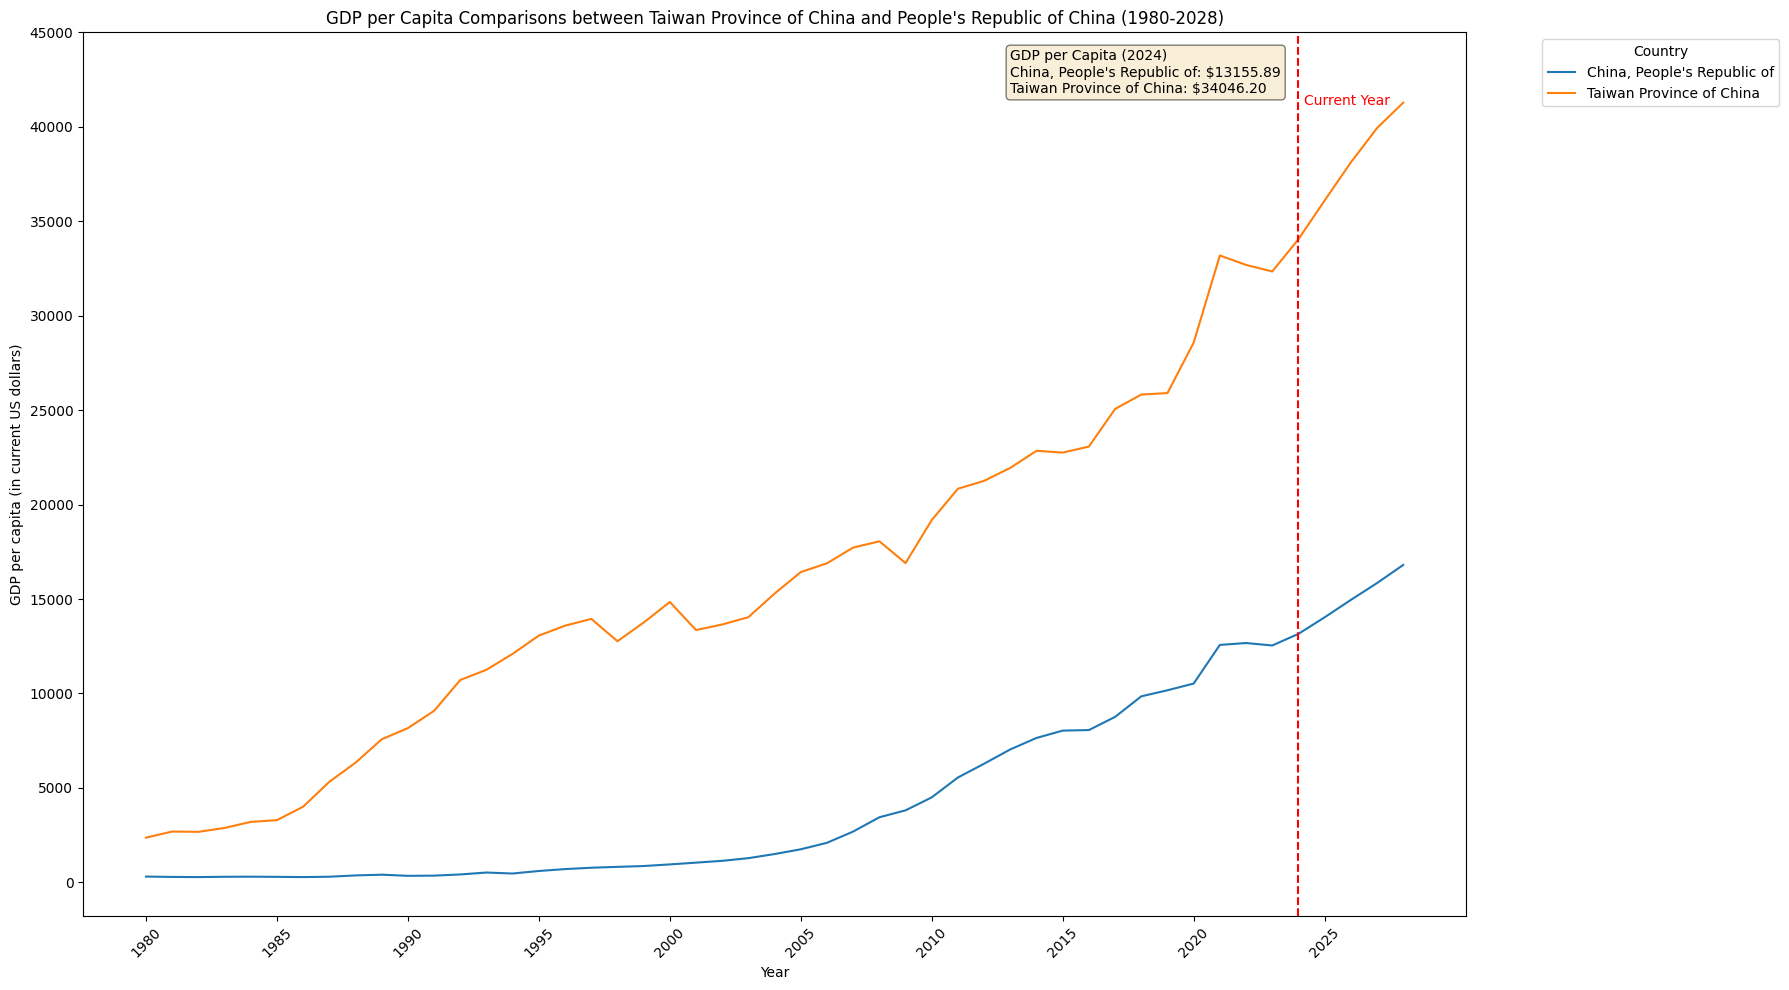

In [ ]:
selected_countries = ["Taiwan Province of China", "China, People's Republic of"]
gdp_selected = gdp_df[gdp_df['Country'].isin(selected_countries)]

# Have years as rows and countries as columns, convert index to integer
transposed = gdp_selected.set_index('Country').transpose()
transposed.index = transposed.index.astype(int)

current_year = datetime.datetime.now().year

# Plot
plt.figure(figsize=(18, 10))
transposed.plot(kind='line', figsize=(18, 10))

# Line and Label for Current year
plt.axvline(x=current_year, color='red', linestyle='--')
plt.text(current_year + 0.2, plt.ylim()[1] * 0.95, 'Current Year', color='red')

plt.xlabel('Year')
plt.ylabel('GDP per capita (in current US dollars)')
plt.title('GDP per Capita Comparisons between Taiwan Province of China and People\'s Republic of China (1980-2028)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the x-ticks to every 5 years and rotate for readability
plt.xticks(ticks=range(1980, 2029, 5), rotation=45)  # Show every 5 years
plt.yticks(ticks=range(0, 45001, 5000))  # Show every 5,000 units on the y-axis

# GDP per Capita 2024 box
textstr = "GDP per Capita (2024)\n"
textstr += '\n'.join([f"{country}: ${transposed.loc[current_year, country]:.2f}" for country in transposed.columns])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2013, plt.ylim()[1] * 0.98, textstr, fontsize=10, va='top', bbox=props)

plt.tight_layout()
plt.show()

<a name="taiwan-imports-analysis"></a>

### Taiwan Imports Analysis

Next, we will analyze the state of Taiwanese Imports. The data pulled for this analysis is the y055 table from the yearbook 2022 report, otherwise known as "Composition of exports and import," more specifically the imports table. A pearson correlation analysis was conducted to analyze or determine if there are any relationships between the total monetary value of imports and the different degree of input intensions and characteristics of goods.

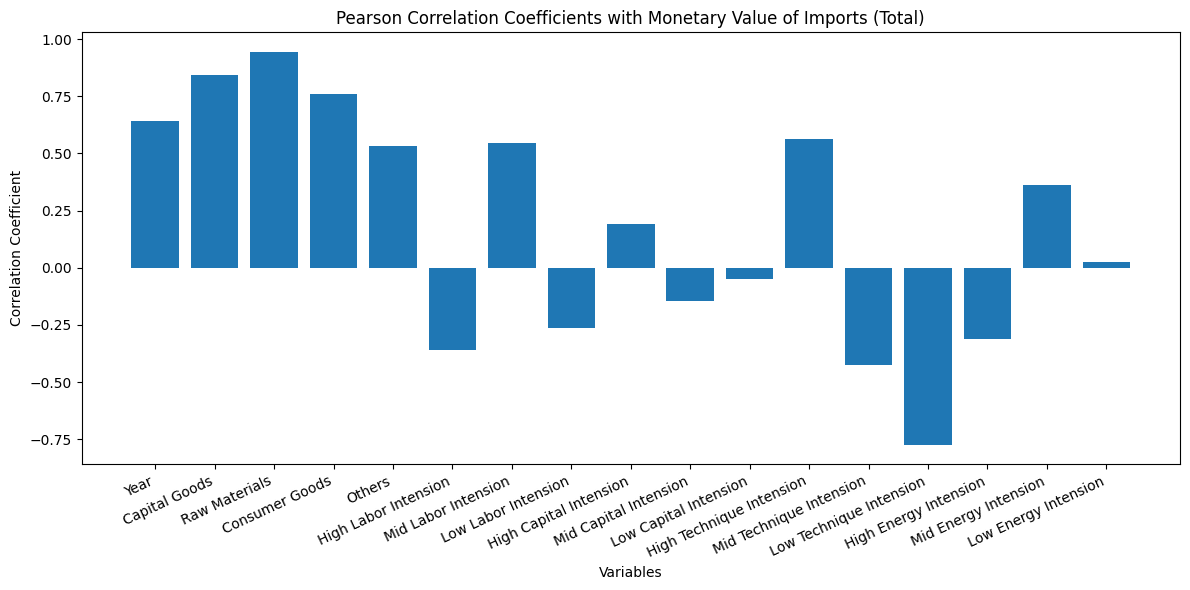

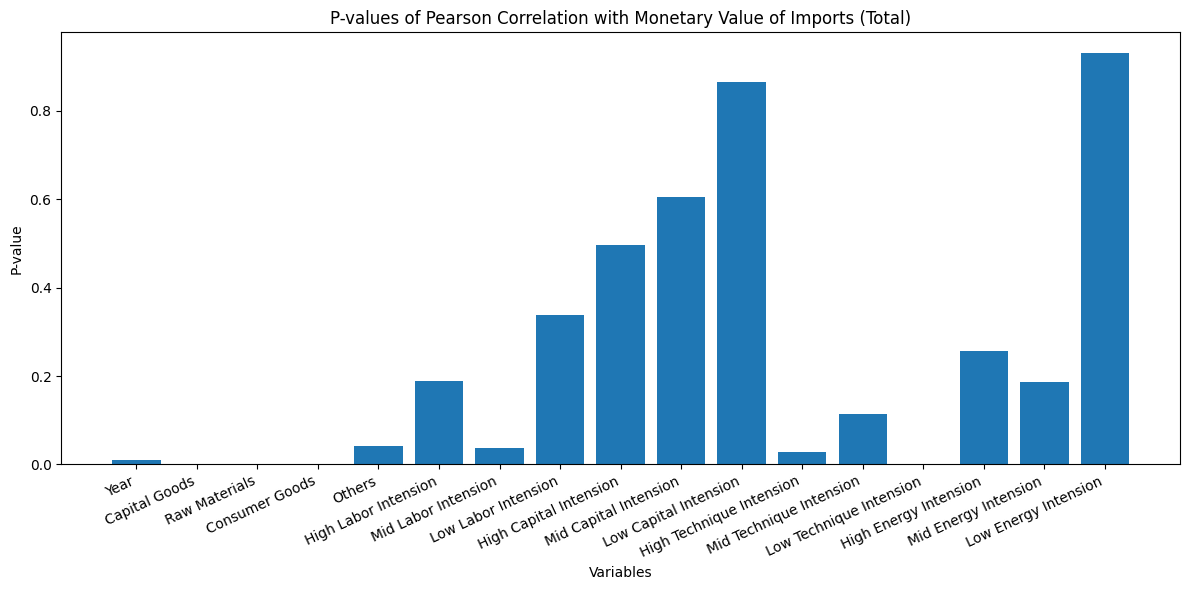

In [ ]:
# Pearson
coefs = []
p_vals = []

for var in import_df.columns:
    if var != 'Total':
        correlation_coeff, p_value = pearsonr(pd.to_numeric(import_df["Total"]), pd.to_numeric(import_df[var]))
        coefs.append(correlation_coeff)
        p_vals.append(p_value)
        #print(f"Pearson correlation coefficient between Total and {var}: {correlation_coeff:.4f}, p-value: {p_value:.4f}")

plt.figure(figsize=(12, 6))
plt.bar([col for col in import_df.columns if col != 'Total'], coefs)
plt.title('Pearson Correlation Coefficients with Monetary Value of Imports (Total)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar([col for col in import_df.columns if col != 'Total'], p_vals)
plt.title('P-values of Pearson Correlation with Monetary Value of Imports (Total)')
plt.xlabel('Variables')
plt.ylabel('P-value')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

There are some positive correlations between Raw Materials, Capital Goods, and Consumer goods with the sum of monetary values of the imports (Total) overall. Additionally, overall, there is a positive (mostly moderate) correlation between year and total, meaning over the years, the sum of monetary values each year increases with some variability (perhaps due to some external economic factors). There are some variables such as High Energy Intension and Low capital intension that have a negative correlation with the total of imports (monetary). However, since the p-values of these variables are significantly >.05, these variables do not have any significance in regards to their relationship with Total in comparison to other variables.

Furthermore, disruptions in the total monetary value of imports may be found in this dataset or analysis. For instance, any trade restrictions or blockades may result in a decrease in imports of raw materials if Taiwan is largely dependent on imports from China or other nations. In this case, there would probably be a negative correlation coefficient between the total import value and particular categories, indicating trade obstacles or geopolitical tensions-related economic difficulties. We know this because the p-value between consumer goods and capital goods and sum of imports (total) is <.05.

<a name="impact-of-mainland-gdp"></a>

### Impact of Mainland Chinese Investment on Taiwanese GDP

For the final part of our exploratory data analysis, we will examine the relationship between Mainland China Investment in Taiwan and Taiwanese GDP to see to what degree China's investments into Taiwan impact Taiwan's economic success.


First, we will create a dataframe that contains both Taiwan's GDP data and Mainland China's investments in Taiwan:

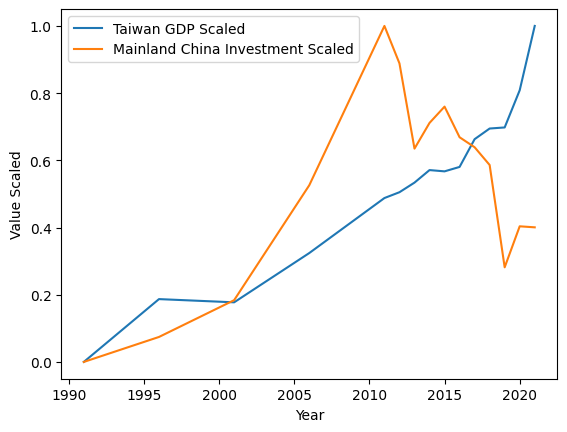

In [ ]:
#Section 1- isolate Taiwan's GDP from the GDP data

taiwan_gdp_df = gdp_df[gdp_df["Country"] == "Taiwan Province of China"]
taiwan_gdp_df.reset_index(inplace=True)

taiwan_gdp_df = taiwan_gdp_df.transpose() #switch rows and columns

#isolate the data points that match with the data points present in the investment dataframe
taiwan_gdp_df = taiwan_gdp_df[2:]
taiwan_gdp_df.reset_index(inplace=True)
taiwan_gdp_df = taiwan_gdp_df[:42]


taiwan_gdp_df.rename(columns={taiwan_gdp_df.columns[0]: 'Year', taiwan_gdp_df.columns[1]: 'Taiwan GDP'}, inplace=True)

taiwan_gdp_df['Year'] = taiwan_gdp_df['Year'].astype(int)
taiwan_gdp_df['Taiwan GDP'] = taiwan_gdp_df['Taiwan GDP'].astype(float)

taiwan_gdp_df = taiwan_gdp_df[((taiwan_gdp_df['Year'] % 5 == 1) & (taiwan_gdp_df['Year'] > 1990)) | (taiwan_gdp_df['Year'] > 2011)]

#Section 2- formatting the investment data

investment_df = investment_df.drop(investment_df.index[:10])
investment_df = investment_df.dropna()
investment_df.reset_index(drop=True, inplace=True)
investment_df = investment_df.drop(investment_df.index[15:])

investment_df['Year'] = investment_df['Year'].astype(int)
investment_df['Mainland China Investment'] = investment_df['Mainland China Investment'].astype(float)
investment_df['Mainland China Investment'] = investment_df['Mainland China Investment'] * 10000 #data from this table is in unit 10,000 US dollars

# Merges the two dataframes

gdp_investment_df = pd.merge(taiwan_gdp_df, investment_df, on='Year')

# The GDP data is per capita, making it much smaller than the investment numbers
# Therefore we will scale the data to make the relationship visible in a plot
scaler = MinMaxScaler()
gdp_investment_df['Taiwan GDP Scaled'] = scaler.fit_transform(gdp_investment_df[['Taiwan GDP']])
gdp_investment_df['Mainland China Investment Scaled'] = scaler.fit_transform(gdp_investment_df[['Mainland China Investment']])

# Plot the resulting scaled columns
ax = gdp_investment_df.plot(x='Year', y='Taiwan GDP Scaled')
gdp_investment_df.plot(x='Year', y='Mainland China Investment Scaled', ax=ax)
plt.xlabel('Year')
plt.ylabel('Value Scaled')

plt.show()


Finally we will conduct the hypothesis test itself with the null and alternate hypotheses:

- $H_{0}$: The Mainland China Investment does not have an effect on Taiwan GDP

- $H_{A}$: Taiwan GPD has an effect on Mainland China Investment

In [ ]:
corr_coef, p_value = pearsonr(gdp_investment_df['Taiwan GDP'], gdp_investment_df['Mainland China Investment'])
print(f"The correlation coefficient is {corr_coef} with a p-value of {p_value}")

The correlation coefficient is 0.41572721581688454 with a p-value of 0.12327702180834257


In conclusion, while the r value of ~0.42 suggests a moderate positive correlation between Mainland China Investment and Taiwan GDP, the p-value of ~0.12 is too high (>0.05) so we do not have enough evidence to reject the null hypothesis of Mainland China Investment not having an effect on GDP. Therefore, the correlation could be due to random variation rather than a true relationship, and there are likely other factors contributing to this positive correlation.

<a name="primary-analysis"></a>

## Primary Analysis

We use PolynomialFeatures and Linear Regression as tools to help analyze the trade between China and Taiwan and to also predict the trade between the two nations over the next 10 years. The dataset we are using for this is the TotalImportsExportsFromToChina, which consists of the total imports from China and total exports to China from Taiwan.

To capture potential non-linear relationships in the trade data, we apply polynomial feature transformation. For training and testing to predict the trends over the next 10 years, we split our dataset into training and testing sets.

We then train our linear regression models (for imports and exports) on the training data to fit the relationship between the transformed years and trade values. After training these models, we predict the trade values for the next 10 years.

In [ ]:
imports_from_china["Time"] = imports_from_china["Time"].astype(int)
exports_from_china["Time"] = exports_from_china["Time"].astype(int)

trade_years = np.array(imports_from_china["Time"]).reshape(-1, 1)
imports_values = np.array(imports_from_china.iloc[:, 3], dtype=float)
exports_values = np.array(exports_from_china.iloc[:, 3], dtype=float)

# Poly
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(trade_years)

# Split the data
years_train, years_test, imports_train, imports_test = train_test_split(years_poly, imports_values, test_size=0.2, random_state=42)
years_train, years_test, exports_train, exports_test = train_test_split(years_poly, exports_values, test_size=0.2, random_state=42)

# Train
imports_model = LinearRegression()
imports_model.fit(years_train, imports_train)

exports_model = LinearRegression()
exports_model.fit(years_train, exports_train)

# Predict for the next 10 years
future_years = np.arange(trade_years.max() + 1, trade_years.max() + 11).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
imports_future = imports_model.predict(future_years_poly)
exports_future = exports_model.predict(future_years_poly)

<ipython-input-110-9566f9e50f75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_from_china["Time"] = imports_from_china["Time"].astype(int)


The fit of our model for imports and exports:

In [ ]:
# Evaluate the model's performance
imports_train_predict = imports_model.predict(years_train)
imports_test_predict = imports_model.predict(years_test)
exports_train_predict = exports_model.predict(years_train)
exports_test_predict = exports_model.predict(years_test)

imports_train_r2 = r2_score(imports_train, imports_train_predict)
imports_test_r2 = r2_score(imports_test, imports_test_predict)
exports_train_r2 = r2_score(exports_train, exports_train_predict)
exports_test_r2 = r2_score(exports_test, exports_test_predict)

print("R-squared Scores:")
print(f"Imports R-squared (Train): {imports_train_r2:.2f}")
print(f"Imports R-squared (Test): {imports_test_r2:.2f}")
print(f"Exports R-squared (Train): {exports_train_r2:.2f}")
print(f"Exports R-squared (Test): {exports_test_r2:.2f}")

R-squared Scores:
Imports R-squared (Train): 0.64
Imports R-squared (Test): 0.90
Exports R-squared (Train): 0.47
Exports R-squared (Test): 0.90


From these scores, 64% of the variability observed in the training data is explained by the model, which is a moderate fit. With the test data, it seems that our model performed well, with 90% variance. However, with the exports data, our model performed a little under with the training data while did well for the testing data. With this, the model performed well with predicting values for future trading trends between Taiwan and China.

<a name="visualization"></a>

## Visualization

We plot the current values of trade over the course of 20 years and predicted values for an addition 10 to visualize the trends and forecast future trade dynamics between Taiwan and China.

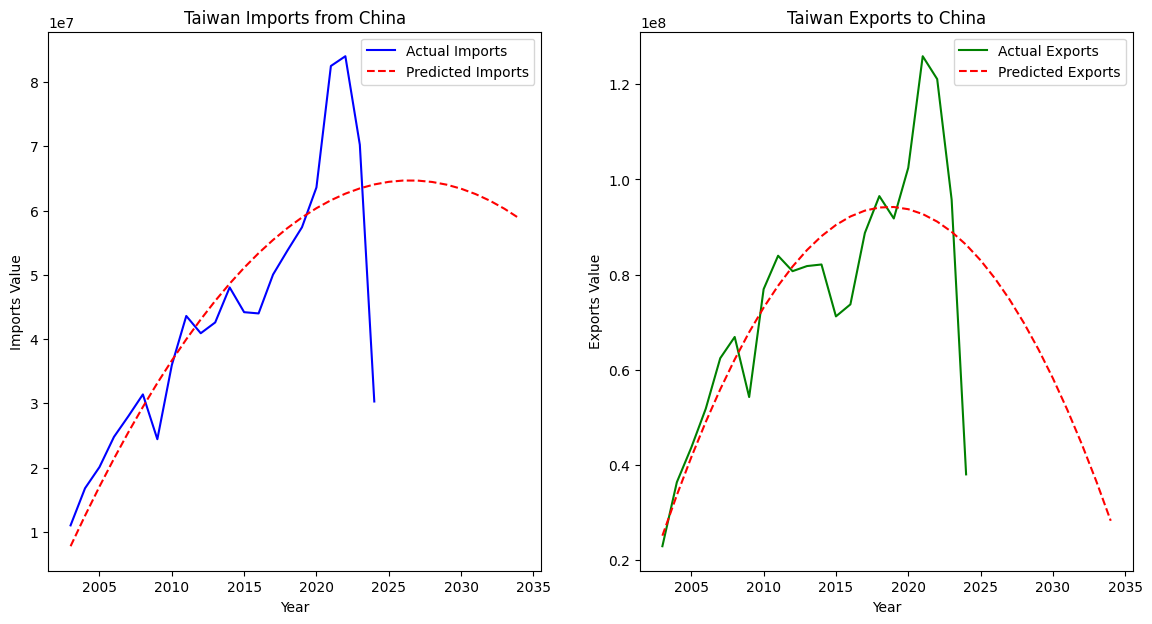

In [ ]:
# plot the imports and exports
plt.figure(figsize=(14, 7))

# imports
plt.subplot(1, 2, 1)
plt.plot(trade_years, imports_values, label='Actual Imports', color='blue')
plt.plot(np.concatenate((trade_years, future_years)), imports_model.predict(poly.transform(np.concatenate((trade_years, future_years)))), label='Predicted Imports', color='red', linestyle='dashed')
plt.title('Taiwan Imports from China')
plt.xlabel('Year')
plt.ylabel('Imports Value')
plt.legend()

# Exports
plt.subplot(1, 2, 2)
plt.plot(trade_years, exports_values, label='Actual Exports', color='green')
plt.plot(np.concatenate((trade_years, future_years)), exports_model.predict(poly.transform(np.concatenate((trade_years, future_years)))), label='Predicted Exports', color='red', linestyle='dashed')
plt.title('Taiwan Exports to China')
plt.xlabel('Year')
plt.ylabel('Exports Value')
plt.legend()

plt.show()

<a name="insights-and-conclusions"></a>

## Insights and Conclusions

As you can see from our Primary Analysis, the trade between Taiwan and China seems to be on a downward trend. Furthermore, the sharp decline in trade in recent years, far outpacing our predictive model, suggest what could be a declining moment in the economic conflict between the two countries.

Additionally, this project has revealed additional insights about Taiwan and China's relationship:
1.  The overall positive correlation between the year and the total import values indicated an increase in trade over the years. With this, potential disruptions in trade due to geopolitical tensions can negatively impact Taiwan's import values, especially for raw materials and consumer goods.
2. Taiwan's dependency on imports from China means that any trade restrictions or blockades can significantly impact Taiwan's economy, leading to drops in imports and/or exports.

Overall, this project has outlined and described a number of different metrics to view the relationship between China and Taiwan. The conflict, while not a physical one, shows clear evidence of the two countries making steps to break their economic relationship, and continuing to watch these indicators is a valuable tool when considering the possibility of expansion of the conflict in coming years.

<a name="related-links"></a>

## Related Links

For more information on these rising tensions, please see these links:

*   [Why China-Taiwan Relations Are So Tense](https://www.cfr.org/backgrounder/china-taiwan-relations-tension-us-policy-biden)
*   [China and Taiwan: A really simple guide](https://www.bbc.com/news/world-asia-china-59900139)
